## 6.5: Unsupervised Machine Learning: Clustering

### This script contains the following:
1. Import libraries and data
2. Data Cleaning
3. The Elbow Technique
4. K-Means Clustering
5. Grouping the data
6. Conclusion

### 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [2]:
# Define path
path = r'C:\Users\sandu\Desktop\Data Immersion&Analytics\6.ADV ANALYTICS\3 Data\Prepared Data'
path1 =r'C:\Users\sandu\Desktop\Data Immersion&Analytics\6.ADV ANALYTICS\4 Analytics\Visualizations'

In [3]:
# Plot charts without calling
%matplotlib inline

In [4]:
# Define column types
dtype_options = {'15':str}

In [6]:
# Import data
df = pd.read_csv(os.path.join(path,'AirBnB_cleaned3.csv'),  index_col=0, low_memory=False)

In [7]:
# Display all columns 
pd.set_option('display.max_columns', None)

### 2. Data Cleanining

In [8]:
# Display columns
df.columns

Index(['Review ID', 'Review_Date', 'Reviewer ID', 'Rating_Comment',
       'Listing ID', 'Listing Name', 'Host ID', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Is Superhost',
       'Neighborhood Group', 'City', 'Postal Code', 'Country', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Accomodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Price', 'Guests Included', 'Min Nights', 'Reviews',
       'First Review', 'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready', 'Price category', 'Rating Category',
       'Accomodation Size'],
      dtype='object')

In [9]:
# Display rows and columns
df.head(10)

,Review ID,Review_Date,Reviewer ID,Rating_Comment,Listing ID,Listing Name,Host ID,Host Since,Host Response Time,Host Response Rate,Is Superhost,Neighborhood Group,City,Postal Code,Country,Latitude,Longitude,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,Price category,Rating Category,Accomodation Size
0,58660447,2016-01-03,14876562,"Very nice, clean appartement! Josh was really ...",10002699,Trendy and peaceful KreuzkÃ¶lln,44696672,2015-09-20,Unknown,Unknown,False,Neukolln,Berlin,12047.0,Germany,52.49234,13.42994,Apartment,Entire home/apt,4,1.0,2.0,2.0,60.0,1,1,1,2016-01-03,2016-01-03,100.0,8.0,10.0,6.0,10.0,10.0,10.0,False,False,Middle price,Good Rating,Couple Accomodation
1,58663795,2016-01-03,49367757,Aki is really nice and friendly. We had an ama...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
2,59003619,2016-01-05,46694292,Aki is a very nice dude with a clean place in ...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
3,66845661,2016-03-25,54542819,Aki's place was easy to find and located in th...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
4,67969785,2016-04-01,35352843,We had to wait 30mins for Aki to arrive but ot...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
5,68816282,2016-04-06,48006291,"Great room, very comfortable and clean. Aki an...",10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
6,69289363,2016-04-10,63759402,Aki was really friendly and available giving u...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
7,69780867,2016-04-13,53960263,Aki es sin duda el mejor host q uno puede tene...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
8,70426866,2016-04-17,26184931,"We did not meer Aki, but we did meet FabiÃ¡n, ...",10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
9,78320875,2016-06-06,12388715,Aki was an awesome host in Berlin. We got alon...

In [10]:
# Display number of rows and columns
df.shape

(406402, 41)

In [11]:
# Display column information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406402 entries, 0 to 452804
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Review ID              406402 non-null  int64  
 1   Review_Date            406402 non-null  object 
 2   Reviewer ID            406402 non-null  int64  
 3   Rating_Comment         406207 non-null  object 
 4   Listing ID             406402 non-null  int64  
 5   Listing Name           406252 non-null  object 
 6   Host ID                406402 non-null  int64  
 7   Host Since             406402 non-null  object 
 8   Host Response Time     406402 non-null  object 
 9   Host Response Rate     406402 non-null  object 
 10  Is Superhost           406402 non-null  bool   
 11  Neighborhood Group     406402 non-null  object 
 12  City                   406402 non-null  object 
 13  Postal Code            406402 non-null  object 
 14  Country                406402 non-null  o

### 3. The Elbow Technique

In [24]:
# Create a list with columns for subset
columns_subset = ['Host Response Rate', 'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Guests Included',
                  'Min Nights', 'Reviews','Overall Rating', 'Accuracy Rating', 'Cleanliness Rating', 
                  'Checkin Rating', 'Communication Rating', 'Location Rating','Value Rating']

In [25]:
# Create Subset only with needed variables 
df_sub = df[columns_subset]

In [26]:
df_sub.head(10)

,Host Response Rate,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating
0,NaN,4,1.0,2.0,2.0,60.0,1,1,1,100.0,8.0,10.0,6.0,10.0,10.0,10.0
1,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
2,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
3,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
4,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
5,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
6,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
7,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
8,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
9,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0


In [23]:
# Replace all "Unknown" with NaN in the entire DataFrame
df.replace('Unknown', 'NaN', inplace=True)

In [27]:
# Standardizing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_sub)

In [28]:
# Create dataframe with standardized data
df_stand = pd.DataFrame(standardized_data, columns=columns_subset)

In [29]:
df_stand.head(10)

,Host Response Rate,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating
0,NaN,0.426289,-0.299025,1.045325,0.036662,-0.118720,-0.525802,-0.514627,-1.211673,1.213872,-3.681182,0.731098,-8.640881,0.44425,0.689561,0.988208
1,0.338707,-0.579086,-0.299025,-0.307465,-0.600529,-0.416073,-0.525802,-0.514627,-0.948899,-0.570788,-1.591336,-2.151459,-1.823465,0.44425,0.689561,-0.733606
2,0.338707,-0.579086,-0.299025,-0.307465,-0.600529,-0.416073,-0.525802,-0.514627,-0.948899,-0.570788,-1.591336,-2.151459,-1.823465,0.44425,0.689561,-0.733606
3,0.338707,-0.579086,-0.299025,-0.307465,-0.600529,-0.416073,-0.525802,-0.514627,-0.948899,-0.570788,-1.591336,-2.151459,-1.823465,0.44425,0.689561,-0.733606
4,0.338707,-0.579086,-0.299025,-0.307465,-0.600529,-0.416073,-0.525802,-0.514627,-0.948899,-0.570788,-1.591336,-2.151459,-1.823465,0.44425,0.689561,-0.733606
5,0.338707,-0.579086,-0.299025,-0.307465,-0.600529,-0.416073,-0.525802,-0.514627,-0.948899,-0.570788,-1.591336,-2.151459,-1.823465,0.44425,0.689561,-0.733606
6,0.338707,-0.579086,-0.299025,-0.307465,-0.600529,-0.416073,-0.525802,-0.514627,-0.948899,-0.570788,-1.591336,-2.151459,-1.823465,0.44425,0.689561,-0.733606
7,0.338707,-0.579086,-0.299025,-0.307465,-0.600529,-0.416073,-0.525802,-0.514627,-0.948899,-0.570788,-1.591336,-2.151459,-1.823465,0.44425,0.689561,-0.733606
8,0.338707,-0.579086,-0.299025,-0.307465,-0.600529,-0.416073,-0.525802,-0.514627,-0.948899,-0.570788,-1.591336,-2.151459,-1.823465,0.44425,0.689561,-0.733606
9,0.338707,-0.579086,-0.299025,-0.307465,-0.600529,-0.416073,-0.525802,-0.514627,-0.948899,-0.570788,-1.591336,-2.151459,-1.823465,0.44425,0.689561,-0.733606


In [30]:
df_stand.shape

(406402, 16)

In [31]:
df_stand.isnull().sum()

Host Response Rate      50821
Accomodates                 0
Bathrooms                   0
Bedrooms                    0
Beds                        0
Price                       0
Guests Included             0
Min Nights                  0
Reviews                     0
Overall Rating              0
Accuracy Rating             0
Cleanliness Rating          0
Checkin Rating              0
Communication Rating        0
Location Rating             0
Value Rating                0
dtype: int64

In [32]:
#Imputing missig values with mean values
Response_mean = df_stand['Host Response Rate'].mean()
df_stand['Host Response Rate'] = df_stand['Host Response Rate'].fillna(Response_mean)

In [33]:
df_stand.isnull().sum() # all missing value imputed 

Host Response Rate      0
Accomodates             0
Bathrooms               0
Bedrooms                0
Beds                    0
Price                   0
Guests Included         0
Min Nights              0
Reviews                 0
Overall Rating          0
Accuracy Rating         0
Cleanliness Rating      0
Checkin Rating          0
Communication Rating    0
Location Rating         0
Value Rating            0
dtype: int64

In [37]:
# Define the range of potential clusters in the data
num_c1 = range(1,10)

In [38]:
# Define k-means cluster in the range we assigned above
kmeans = [KMeans(n_clusters = i) for i in num_c1]

In [39]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_stand).score(df_stand) for i in range(len(kmeans))]
score

C:\Users\sandu\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sandu\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sandu\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sandu\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-6451610.999999357,
 -5378066.861531227,
 -4613192.245222263,
 -4322243.028538033,
 -4047436.5427845586,
 -3965949.4587353994,
 -3653490.0255057756,
 -3499890.024066394,
 -3383610.086859825]

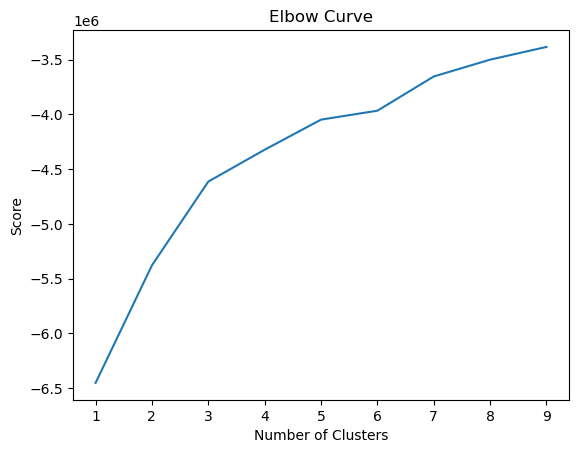

In [40]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Looks like three is the best amount of clusters 

### 4. K-Means Clustering

In [41]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [42]:
# Fit the k-means object to the data.
kmeans.fit(df_stand)

C:\Users\sandu\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [43]:
from sklearn.cluster import KMeans

# Explicitly set n_init to suppress the warning
kmeans = KMeans(n_clusters=3, n_init=10)  # You can adjust the number of clusters and n_init as needed
kmeans.fit(df_stand)

KMeans(n_clusters=3, n_init=10)

In [45]:
df_stand['clusters'] = kmeans.fit_predict(df_stand)

In [46]:
df_stand.head()

,Host Response Rate,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,clusters
0,2.424287e-16,0.426289,-0.299025,1.045325,0.036662,-0.118720,-0.525802,-0.514627,-1.211673,1.213872,-3.681182,0.731098,-8.640881,0.44425,0.689561,0.988208,0
1,3.387073e-01,-0.579086,-0.299025,-0.307465,-0.600529,-0.416073,-0.525802,-0.514627,-0.948899,-0.570788,-1.591336,-2.151459,-1.823465,0.44425,0.689561,-0.733606,0
2,3.387073e-01,-0.579086,-0.299025,-0.307465,-0.600529,-0.416073,-0.525802,-0.514627,-0.948899,-0.570788,-1.591336,-2.151459,-1.823465,0.44425,0.689561,-0.733606,0
3,3.387073e-01,-0.579086,-0.299025,-0.307465,-0.600529,-0.416073,-0.525802,-0.514627,-0.948899,-0.570788,-1.591336,-2.151459,-1.823465,0.44425,0.689561,-0.733606,0
4,3.387073e-01,-0.579086,-0.299025,-0.307465,-0.600529,-0.416073,-0.525802,-0.514627,-0.948899,-0.570788,-1.591336,-2.151459,-1.823465,0.44425,0.689561,-0.733606,0


In [48]:
df_stand['clusters'].value_counts()

clusters
1    276073
0     85608
2     44721
Name: count, dtype: int64

In [49]:
df_stand['Price'].min()

-0.8204742377478064

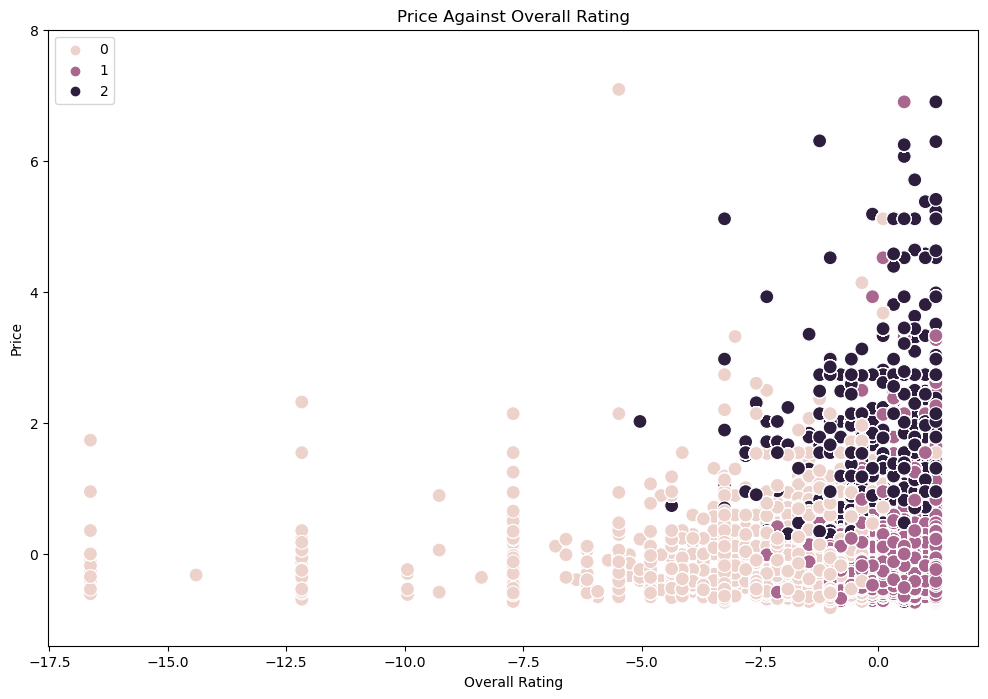

In [51]:
# Plot the clusters for the "Price" and "Overall Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Overall Rating'], y=df_stand['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Overall Rating') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.title('Price Against Overall Rating')

# Set max/min for Y Axis
y_min = -1.4
y_max = 8
ax.set_ylim(y_min, y_max)


plt.show()

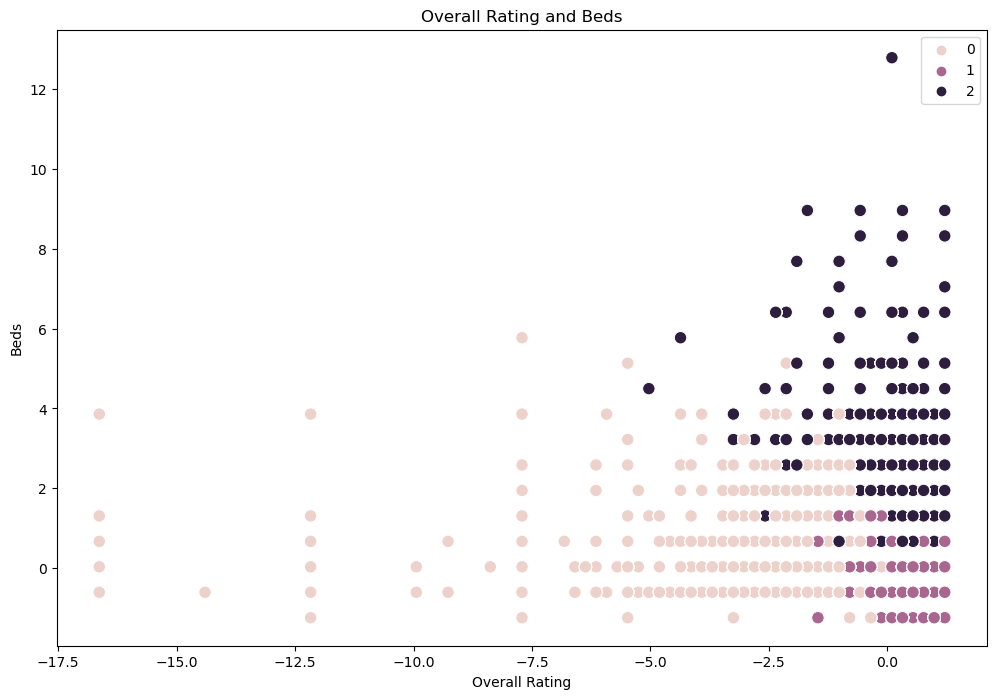

In [54]:
# Plot the clusters for the "Overall Rating" and "Beds" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Overall Rating'], y=df_stand['Beds'], hue=kmeans.labels_, s=80)

ax.grid(False) 
plt.xlabel('Overall Rating') 
plt.ylabel('Beds') 
plt.title('Overall Rating and Beds')
plt.show()

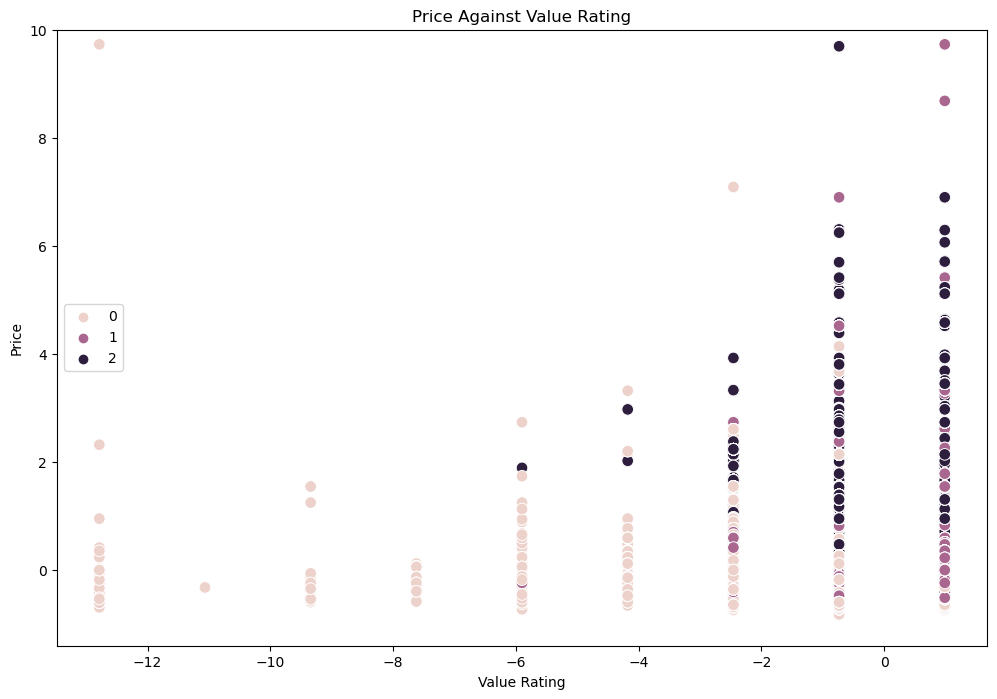

In [56]:
# Plot the clusters for the "Value Rating" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Value Rating'], y=df_stand['Price'], hue=kmeans.labels_, s=70)

ax.grid(False) 
plt.xlabel('Value Rating') 
plt.ylabel('Price') 
plt.title('Price Against Value Rating')

# Set max/min for Y Axis
y_min = -1.4
y_max = 10
ax.set_ylim(y_min, y_max)


plt.show()

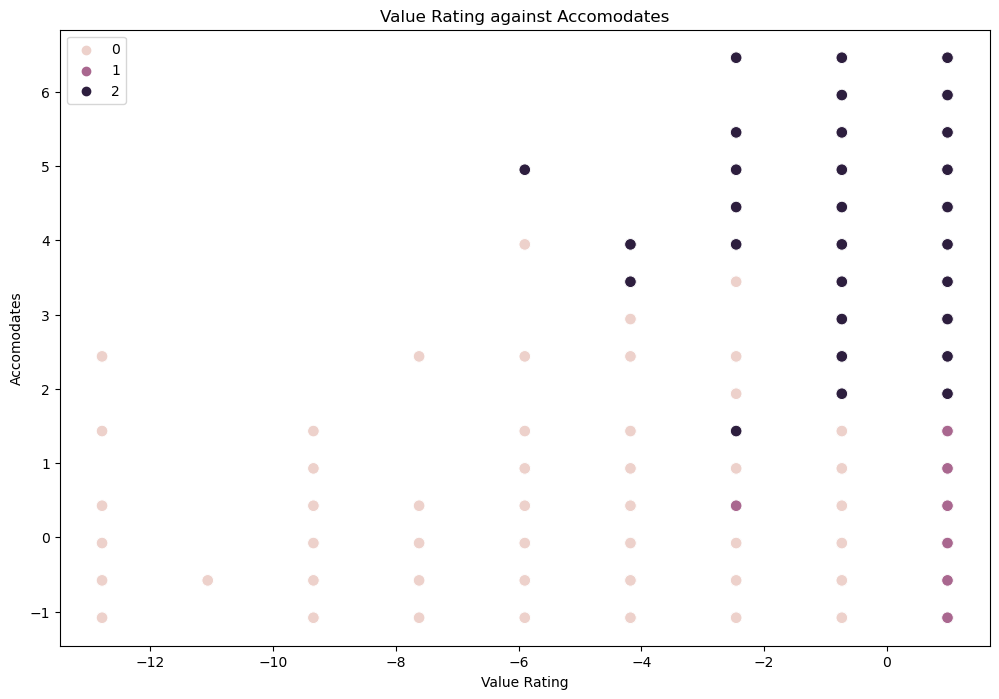

In [58]:
# Plot the clusters for the "Value Rating" and "Beds" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Value Rating'], y=df_stand['Accomodates'], hue=kmeans.labels_, s=70)

ax.grid(False) 
plt.xlabel('Value Rating') 
plt.ylabel('Accomodates') 
plt.title('Value Rating against Accomodates')

plt.show()

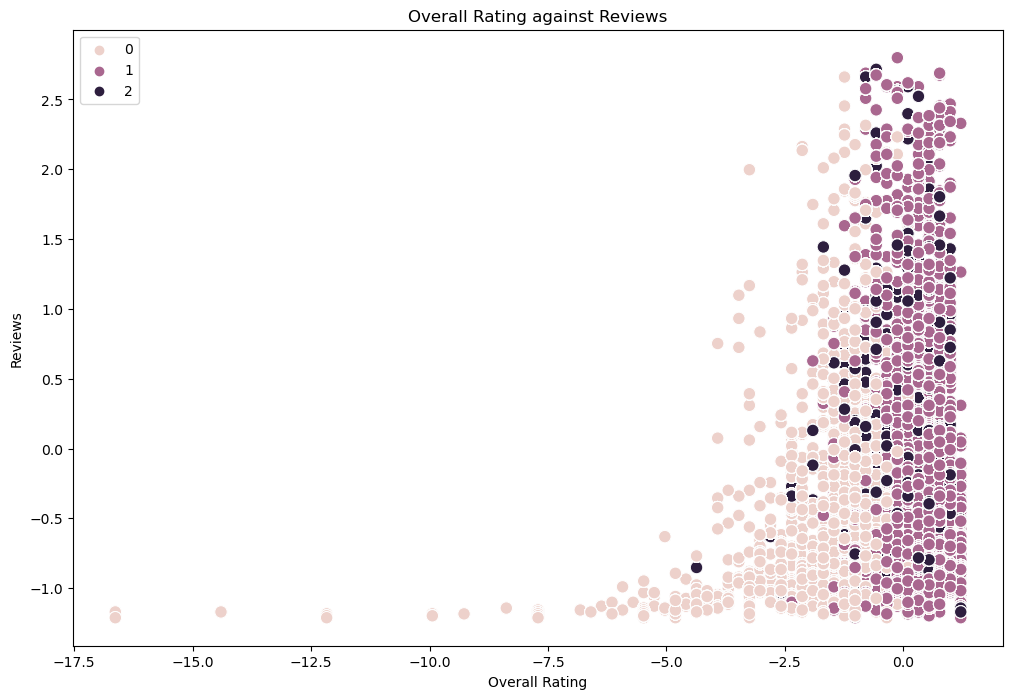

In [60]:
# Plot the clusters for the "Overall Rating" and "Reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Overall Rating'], y=df_stand['Reviews'], hue=kmeans.labels_, s=80)

ax.grid(False) 
plt.xlabel('Overall Rating') 
plt.ylabel('Reviews') 
plt.title('Overall Rating against Reviews')

plt.show()

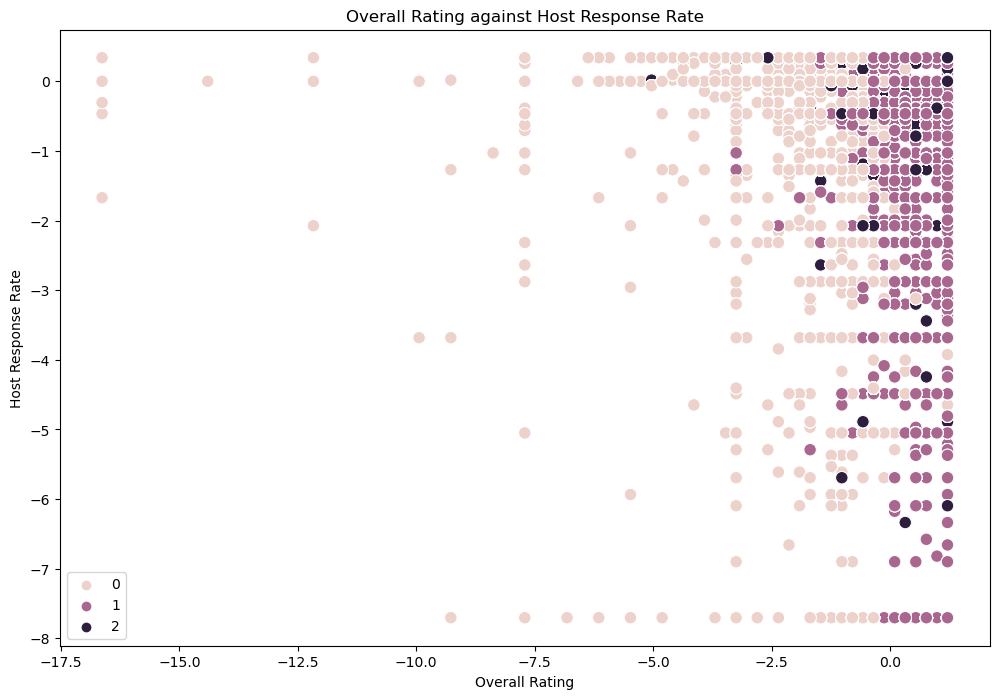

In [61]:
# Plot the clusters for the "Overall Rating" and "Host Response Rate" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Overall Rating'], y=df_stand['Host Response Rate'], hue=kmeans.labels_, s=80)

ax.grid(False) 
plt.xlabel('Overall Rating') 
plt.ylabel('Host Response Rate') 
plt.title('Overall Rating against Host Response Rate')

plt.show()

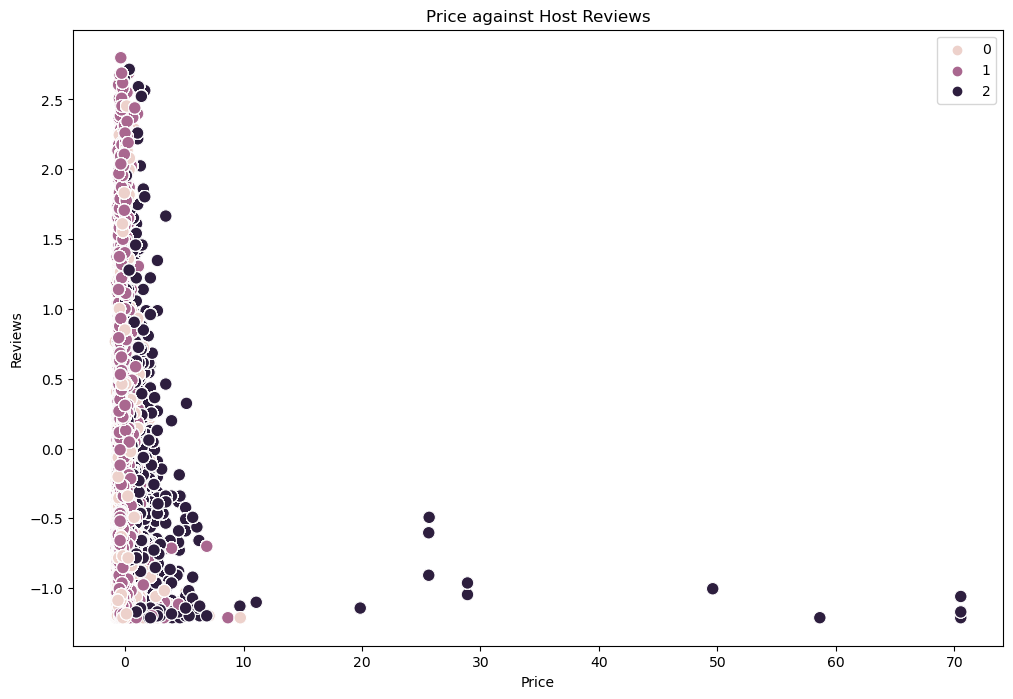

In [63]:
# Plot the clusters for the "Price" and "Reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Price'], y=df_stand['Reviews'], hue=kmeans.labels_, s=80)

ax.grid(False) 
plt.xlabel('Price') 
plt.ylabel('Reviews') 
plt.title('Price against Host Reviews')

plt.show()

NOTE: The only usefull insight the clusters give is that higher price also means much higher chance for high Overall Rating. On the Cluster 2 with only higher prices the overall rating hasn't many bad ratings. On the cluster 0 there are a lot of bad ratings. The Cluster 1 looks like a cluster with small accomodations/private rooms they have good ratings overal

### 5. Grouping the data

In [64]:
df_stand.loc[df_stand['clusters'] == 2, 'cluster'] = 'dark purple'
df_stand.loc[df_stand['clusters'] == 1, 'cluster'] = 'purple'
df_stand.loc[df_stand['clusters'] == 0, 'cluster'] = 'pink'

In [65]:
df_stand.groupby('cluster').agg({'Host Response Rate': ['mean', 'median'], 'Accomodates': ['mean', 'median'], 
                           'Bathrooms': ['mean', 'median'], 'Bedrooms': ['mean', 'median'], 'Beds': ['mean', 'median'], 
                           'Price': ['mean', 'median'], 'Guests Included': ['mean', 'median'],'Min Nights': ['mean', 'median'],
                           'Reviews': ['mean', 'median'],'Overall Rating': ['mean', 'median'], 
                           'Accuracy Rating': ['mean', 'median'], 'Cleanliness Rating': ['mean', 'median'], 
                           'Checkin Rating': ['mean', 'median'], 'Communication Rating': ['mean', 'median'], 
                           'Location Rating': ['mean', 'median'],'Value Rating': ['mean', 'median']})

Host Response Rate           Accomodates           Bathrooms  \
                          mean    median        mean    median      mean   
cluster                                                                    
dark purple           0.147723  0.338707    1.927629  1.431663  1.184306   
pink                 -0.178793  0.338707    0.058058 -0.076398 -0.140418   
purple                0.031513  0.338707   -0.330259 -0.579086 -0.148303   

                       Bedrooms                Beds               Price  \
               median      mean    median      mean    median      mean   
cluster                                                                   
dark purple  1.146834  1.891557  2.398116  1.843495  1.311043  1.237845   
pink        -0.299025 -0.149033 -0.307465  0.067275  0.036662 -0.103596   
purple      -0.299025 -0.260199 -0.307465 -0.319489 -0.600529 -0.168394   

                      Guests Included           Min Nights            \
               median            mean    median       mean    median   
cluster                                                                
dark purple  0.939859        1.706308  2.161949  -0.069396  0.031102   
pink        -0.213873       -0.075886 -0.525802  -0.040741 -0.241763   
purple      -0.249555       -0.252873 -0.525802   0.023875 -0.241763   

              Reviews           Overall Rating           Accuracy Rating  \
                 mean    median           mean    median            mean   
cluster                                                                    
dark purple  0.240437  0.129859       0.067721  0.098459        0.145087   
pink        -0.053373 -0.285048      -1.296577 -1.016953       -1.358300   
purple      -0.022398 -0.312708       0.391088  0.544624        0.397695   

                      Cleanliness Rating           Checkin Rating            \
               median               mean    median           mean    median   
cluster                                                                       
dark purple  0.498511           0.172260  0.731098       0.152606  0.449007   
pink        -1.591336          -1.065062 -0.710181      -1.138230 -1.823465   
purple       0.498511           0.302363  0.731098       0.328235  0.449007   

            Communication Rating           Location Rating            \
                            mean    median            mean    median   
cluster                                                                
dark purple             0.149585  0.444250       -0.103894  0.689561   
pink                   -1.251490 -1.783976       -0.545584 -1.189295   
purple                  0.363846  0.444250        0.186011  0.689561   

            Value Rating            
                    mean    median  
cluster                             
dark purple    -0.281486 -0.733606  
pink           -0.963253 -0.733606  
purple          0.344295  0.988208

### 6. Conclusion

##### Dark Purple Cluster(High Prices/big Accomodation):

Has the best stats in almost all categories. The ratings are much better than the pink custer ratings but a little bit worse than the purple cluster ratings. They also can accomodate more people in general.

#####  Pink Cluster(Medium Prices/Medium Accomodation):

Has by far the worst ratings, also the least amount of reviews.

##### Purple Cluster(Low Price/Small Accomodation/private rooms):

Has the lowest prices and the best ratings overall. But it seems you also have to stay the longest time to be able to book the listings. As the Min Night suggests. They are also by far the smallest accomodations. I guess that are mostly private rooms with shares bathroom and kitchen. The high mean of min nights could be an indication for long time listings that are only able to book for a whole week/month

In [67]:
# Export the dataset
df_stand.to_excel('4.0 AirBnB with cluster and categories.xlsx', index=False)